# **Proyek Sistem Rekomendasi**

- Nama : Margareth Serepine S
- Cohort ID : MC319D5X0736
- Email : margareths4167@gmail.com


# **Project Overview**

Pandemi Covid-19 pada tahun 2021 memicu lonjakan besar dalam penggunaan MOOC (Massive Open Online Courses). Dengan melimpahnya kursus online dari berbagai institusi dan platform, banyak pelajar mengalami kesulitan dalam menghadapi tantangan dalam menemukan kursus yang paling sesuai dengan kebutuhan dan tingkat keterampilan mereka. <br>

Oleh karena itu, penerapan sistem rekomendasi berbasis machine learning dalam konteks pendidikan daring tidak hanya relevan, tetapi juga sangat krusial untuk meningkatkan efektivitas pembelajaran, retensi pengguna, dan keberhasilan penyelesaian kursus. Sistem rekomendasi ini akan membantu pengguna memilih kursus dengan cara yang lebih personal dan efisien, terutama berdasarkan informasi deskripsi kursus, keterampilan, dan tingkat kesulitan.



# **Import Library**

Pada bagian ini, dilakukan proses import berbagai library dan modul yang digunakan. Berikut penjelasan masing-masing library dan fungsinya:
- `numpy as np`: Library fundamental untuk komputasi numerik di Python. Sering digunakan untuk operasi matematis, manipulasi array, dan perhitungan vektor/matriks.
- `matplotlib.pyplot as plt`: Library untuk visualisasi data dalam bentuk grafik. Digunakan untuk membuat plot seperti garis, batang, histogram, dan scatter plot.
- `pandas as pd`: Library populer untuk manipulasi dan analisis data berbasis tabel (DataFrame). Digunakan untuk membaca, menulis, dan memproses data terstruktur.
- `seaborn as sns`: Library visualisasi yang dibangun di atas matplotlib, lebih khusus untuk visualisasi statistik yang lebih estetis dan informatif.
- `os`: Digunakan untuk berinteraksi dengan sistem file dan environment.
- `re`: Modul untuk ekspresi reguler, berguna dalam pencocokan dan pemrosesan string.
- `shutil`: Digunakan untuk operasi file tingkat tinggi, seperti copy, move, dan delete file atau folder.
- `kagglehub`: Modul ini digunakan untuk mengakses model atau data dari Kaggle Hub, platform distribusi model dan dataset dari komunitas Kaggle (biasanya digunakan untuk mendownload model siap pakai).
- `collections.Counter`: Digunakan untuk menghitung frekuensi elemen dalam iterable, seperti menghitung kemunculan kata atau label.
- `sklearn.impute.SimpleImputer`: Modul dari Scikit-learn yang digunakan untuk menangani missing value (nilai kosong) dengan strategi seperti mean, median, atau modus.
- `sklearn.metrics.pairwise.cosine_similarity`: Fungsi untuk menghitung kemiripan kosinus antar vektor, biasa digunakan dalam sistem rekomendasi berbasis konten untuk mengukur kemiripan antar item atau dokumen.
- `sklearn.feature_extraction.text.TfidfVectorizer`: Digunakan untuk mengubah kumpulan teks menjadi representasi numerik berbasis TF-IDF (Term Frequency-Inverse Document Frequency), yang mencerminkan pentingnya kata dalam dokumen relatif terhadap kumpulan dokumen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, re, shutil, kagglehub

from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Data**

Mengunduh Dataset dari Kaggle Hub menggunakan pustaka `kagglehub`.

In [2]:
path = kagglehub.dataset_download("khusheekapoor/coursera-courses-dataset-2021")

print("Path to dataset files:", path)

100%|██████████| 1.65M/1.65M [00:00<00:00, 25.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/khusheekapoor/coursera-courses-dataset-2021/versions/1


In [3]:
path

'/root/.cache/kagglehub/datasets/khusheekapoor/coursera-courses-dataset-2021/versions/1'

In [4]:
path = ''.join([path, '/', os.listdir(path)[0]])
path

'/root/.cache/kagglehub/datasets/khusheekapoor/coursera-courses-dataset-2021/versions/1/Coursera.csv'

Setelah dataset berhasil diunduh, langkah selanjutnya adalah menentukan path lengkap menuju folder yang berisi file dataset.


In [5]:
df = pd.read_csv(path)
df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


**Mengecek ukuran dataset**

In [6]:
df.shape

(3522, 7)

Hasil `3.522, 7)` menunjukkan bahwa dataset memiliki:

- `3.522` baris (rows): merepresentasikan kursus yang tersedia di platform Coursera.
- `7` kolom (columns): merepresentasikan fitur (kolom) atau atribut dari kursus yang tersedia.


# **Data Feature**

**Menampilkan info dari data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


Deskripsi fitur (kolom) :
- `Course Name` : Nama kursus,
- `University` : Universitas yang menawarkan Kursus,
- `Difficulty Level` : Tingkat Kesulitan Kursus.
- `Course Rating` : Nilai rating kursus dalam skala 0 - 5,
- `Course URL` : Tautan ke halaman kursus,
- `Course Description` : Deskripsi Kursus.
- `Skills` : Keterampilan yang terkait dengan Kursus.

Keterangan tambahan :
- Berdasarkan dataset, data yang hilang (kosong) diwakili oleh `Not Calibrated`.






# **Data Checking**

Melakukan pengecekan data untuk mengecek nilai yang hilang, dan data yang memiliki duplikasi.

**Deteksi Nilai yang Hilang/Kosong (Missing Values)**

In [8]:
df.isnull().sum()

,0
Course Name,0
University,0
Difficulty Level,0
Course Rating,0
Course URL,0
Course Description,0
Skills,0


Dalam mengecek secara normal tidak ada terdeteksi data yang hilang. Namun pada dataset, diberikan keterangan bahwa data yang memiliki nilai yang hilang diberi nilai `Not Calibrated`.

Mengecek fitur (kolom) yang mengandung nilai `Not Calibrated` yang dianggap sebagai nilai yang hilang (kosong)

In [9]:
for column in df.columns:
    count = df[column].astype(str).str.contains("Not Calibrated").sum()
    if count > 0:
        print(f'Kolom "{column}" mengandung {count} nilai "Not Calibrated"')

Kolom "Difficulty Level" mengandung 50 nilai "Not Calibrated"
Kolom "Course Rating" mengandung 82 nilai "Not Calibrated"


**Deteksi Data yang Duplikat**

In [10]:
df.duplicated().sum()

np.int64(98)

Hasil `np.int64(98)` menunjukkan ada 98 baris data yang terdeteksi sebagai duplikat.

# **Univariate Exploratory Data Analysis**

In [11]:
df.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')

**Visualisasi Course Rating**

In [12]:
df['Course Rating'].value_counts()

,count
Course Rating,
4.7,740
4.6,623
4.8,598
4.5,389
4.4,242
4.9,180
4.3,165
4.2,121
5,90


<ipython-input-13-4139970247>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


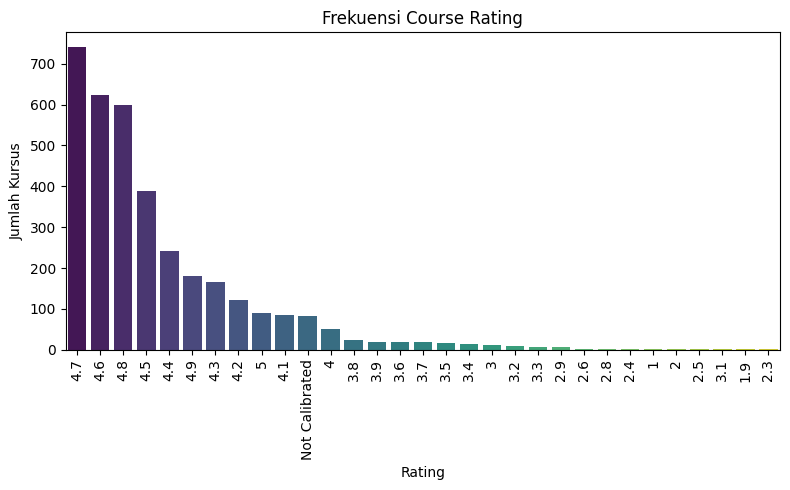

In [13]:
# Menghitung frekuensi nilai Course Rating
rating_counts = df['Course Rating'].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Frekuensi Course Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Kursus')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Distribusi hasil :
 * Dominasi Rating Positif : Rating 4.7, 4.6, dan 4.8 merupakan yang nilai yang paling sering muncul, masing-masing dengan jumlah kursus lebih dari 600. Hal ini mencerminkan bahwa mayoritas kursus memiliki tingkat kepuasan pengguna yang sangat tinggi. Platform kemungkinan besar berhasil mempertahankan standar kualitas yang baik dalam penyediaan kursus.
 * Minimnya Kursus dengan Rating Rendah : Kursus dengan rating di bawah 4.0 jumlahnya sangat sedikit dibandingkan dengan kursus yang memiliki rating tinggi. Menunjukkan bahwa kursus dengan kualitas rendah mungkin sudah dihapus, atau pengguna memang jarang memilih kursus yang tidak populer.
 * Nilai "Not Calibrated" : Sebanyak 82 data yang memiliki label "Not Calibrated" yang artinya tidak memiliki rating. Dimana data ini secara khusus akan diganti nilainya menjadi NaN supaya dapat terdeteksi menjadi nilai yang kosong.
 * Distribusi Miring Positif (Right Skewed) : Distribusi data condong ke rating tinggi yang artinya sebagian besar kursus dinilai sangat baik, sementara hanya sedikit yang mendapat rating rendah.

**Analisis Fitur Nama Kursus dan Universitas**

In [14]:
columns_to_plot = list(df.columns)[0:2]
for column in columns_to_plot:
  print(f"Kolom : {column}")
  print(df[column].value_counts(sort='descending'))
  print("\n")

Kolom : Course Name
Course Name
Google Cloud Platform Fundamentals: Core Infrastructure    8
Python for Data Science and AI                             4
Data Visualization with Python                             4
The Art of Music Production                                4
What is Data Science?                                      4
                                                          ..
Managerial Accounting Fundamentals                         1
Data Visualization                                         1
FinTech Security and Regulation (RegTech)                  1
Using Shiny to Plot Differential Gene Expression           1
How to Finance and Grow Your Startup � Without VC          1
Name: count, Length: 3416, dtype: int64


Kolom : University
University
Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
Johns Hopkins University                      110
University of Colorado Boulder                101
University of Michigan   

Hasil :    
- Fitur Course Name (Nama) : Total 3.416 kursus unik yang dicatat dalam kolom ini dengan kursus paling populer yaitu "Google Cloud Platform Fundamentals: Core Infrastructure" yang muncul sebanyak 8 kali. Sebagian besar kursus hanya muncul sekali, menunjukkan bahwa mayoritas kursus bersifat unik. Platform memiliki beragam topik kursus, menunjukkan variasi yang besar.
- Fitur University (Universitas) : Terdapat 184 institusi/universitas yang menawarkan kursus. Dengan lima (5) universitas teratas yaitu Coursera Project Network sebanyak 562 kursus, University of Illinois at Urbana-Champaign sebanyak 138 kursus, Johns Hopkins University sebanyak 110 kursus, University of Colorado Boulder sebanyak 101 kursus, dan University of Michigan sebanyak 101 kursus. Banyak universitas/institusi hanya memiliki satu (1) kursus yang menandakan keragaman kontributor dalam platform ini.

**Visualisasi Fitur Difficulty Level**

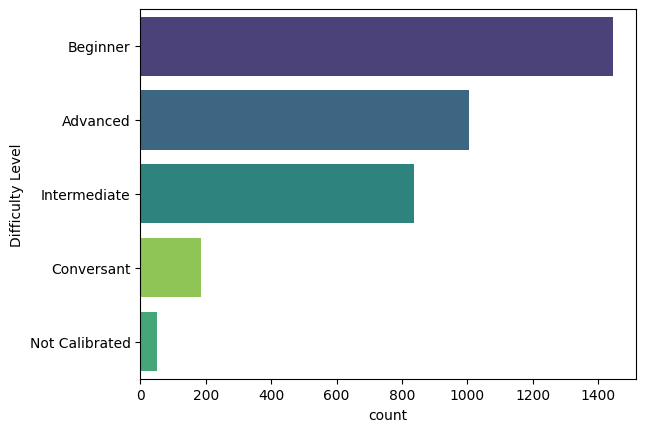

In [15]:
order = df['Difficulty Level'].value_counts(sort='descending').index
sns.countplot(data=df, y='Difficulty Level', order=order, palette='viridis', hue='Difficulty Level')
plt.show()

Distribusi hasil :
- Beginner (Pemula) merupakan tingkat kesulitan yang paling banyak, dengan jumlah lebih dari 1400 kursus. Hal ini menunjukkan bahwa platform ini sangat ramah bagi pemula.
- Advanced dan Intermediate juga memiliki representasi yang tinggi, masing-masing mendekati 1000 dan 850 kursus, menandakan adanya banyak kursus untuk pengguna yang sudah memiliki pengetahuan menengah hingga lanjut.
- Conversant (cukup menguasai) memiliki jauh lebih sedikit kursus (~200), menunjukkan bahwa label ini tidak banyak digunakan oleh pengguna/instruktur dan penyedia kursus
- Not Calibrated berjumlah sangat sedikit, yang merupakan data tidak lengkap (missing value), dan perlu ditangani pada tahap selanjutnya.

# **Data Preparation**

### Data Cleaning

**Mengubah nilai 'Not Calibrated'**

In [16]:
df.replace("Not Calibrated", np.nan,inplace=True)

Data yang terdeteksi sebagai nilai `Not Calibrated` diganti menjadi `NaN` supaya saat mendeteksi 'missing value' jumlahnya dapat terdeteksi oleh sistem.

In [17]:
df.isnull().sum()

,0
Course Name,0
University,0
Difficulty Level,50
Course Rating,82
Course URL,0
Course Description,0
Skills,0


Setelah nilai diubah, tampilan menunjukkan bahwa total missing value pada data sebanyak :    
- 50 buah pada fitur `Difficulty Level`
- 82 buah pada fitur `Course Rating`

**Mengganti Tipe Data Fitur Course Rating**

In [18]:
df['Course Rating'] = df['Course Rating'].astype(float)

Mengganti tipe data Course Rating menjadi `float` untuk memastikan data dapat dianalisis, divisualisasikan, dan digunakan dalam algoritma machine learning yang memerlukan input numerik.

**Penanganan Missing Value pada Fitur Course Rating**

In [19]:
impute = SimpleImputer(strategy="median")
df['Course Rating'] = impute.fit_transform(df[['Course Rating']])

Untuk mengatasi missing value pada kolom Course Rating dilakukan pengubahan nilai, yaitu mengganti nilai yang dideteksi sebagai missing value menggunakan nilai median dari seluruh data pada kolom tersebut.

**Penanganan Missing Value pada Fitur Difficulty Level**

In [20]:
df.loc[df['Difficulty Level'].isna(), 'Difficulty Level'] = df['Difficulty Level'].mode()[0]

Untuk mengatasi missing value pada kolom Difficulty Level dilakukan pengubahan nilai yaitu mengganti missing value menggunakan nilai modus (mode) dari kolom tersebut karena nilai yang paling sering muncul (modus) mewakili sebagian besar data, sehingga aman digunakan sebagai pengganti nilai yang hilang.

**Menghapus Data Duplikat**

In [21]:
df = df.drop_duplicates()

Menghapus semua data yang terdeteksi duplikat

In [22]:
df = df.copy()

**Menghapus Karakter Khusus**

In [23]:
df.loc[:, 'Course Name'] = df['Course Name'].str.replace(r'[:,\-]', ' ', regex=True)
df.loc[:, 'Course Description'] = df['Course Description'].str.replace(r'[-\.:,]', ' ', regex=True)
df.loc[:, 'Skills'] = df['Skills'].str.replace(r'[-\.:,()]', ' ', regex=True)

Menghapus atau mengganti karakter-karakter khusus pada kolom teks dengan spasi, agar teks lebih bersih dan mudah diproses lebih lanjut untuk pemodelan.

### Text Feature Transformation

**Fitur Gabungan Representasi Teks**

In [24]:
df.loc[:, 'Final Col'] = df['Course Name'] + ' ' + df['Course Description'] + ' ' + df['Skills'] + ' ' + df['Difficulty Level']

Menggabungkan beberapa kolom seperti `Course Name`, `Course Description`, `Skills`, dan `Difficulty Level` ke dalam satu kolom baru bernama `Final Col` yang akan digunakan sebagai fitur input pada sistem rekomendasi berbasis content-based filtering

In [25]:
df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Final Col
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write A Feature Length Screenplay For Film Or ...
1,Business Strategy Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,By the end of this guided project you will be...,Finance business plan persona user experien...,Business Strategy Business Model Canvas Analy...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Silicon Thin Film Solar Cells This course cons...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,When it comes to numbers there is always more...,accounts receivable dupont analysis analysis...,Finance for Managers When it comes to numbers ...
4,Retrieve Data using Single Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select sql database manageme...,Retrieve Data using Single Table SQL Queries I...
...,...,...,...,...,...,...,...,...
3517,Capstone Retrieving Processing and Visualiz...,University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,In the capstone students will build a series ...,Databases syntax analysis web Data Visuali...,Capstone Retrieving Processing and Visualiz...
3518,Patrick Henry Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,�Give me liberty or give me death � Rememberi...,retirement Causality career history of the ...,Patrick Henry Forgotten Founder �Give me libe...
3519,Business intelligence and data analytics Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...,Business intelligence and data analytics Gene...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,This course teaches dynamics one of the basic...,Angular Mechanical Design fluid mechanics F...,Rigid Body Dynamics This course teaches dynami...


**Ekstraksi Fitur Teks**

In [26]:
# Inisialisasi TF-IDF vectorizer dengan stop words bahasa Inggris
vectorizer = TfidfVectorizer(stop_words='english')

# Mengisi nilai kosong dengan string kosong
df.loc[:, 'Final Col'] = df['Final Col'].fillna('')
# Membuat matriks TF-IDF dari kolom teks
tfidf_matrix = vectorizer.fit_transform(df['Final Col'])

Mengonversi kolom `Final Col` menjadi fitur numerik berbobot menggunakan TF-IDF untuk memungkinkan pemodelan kemiripan antar kursus berdasarkan deskripsi, nama, skill, dan tingkat kesulitan.

# **Modeling**

**Similarity Calculation**

In [27]:
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

Menghitung kemiripan antar kursus berdasarkan hasil ekstraksi fitur TF-IDF dari kolom Final Col, yang telah merepresentasikan informasi gabungan dari beberapa fitur

**Index Mapping**

In [28]:
indices = pd.Series(df.index, index=df['Course Name']).drop_duplicates()

Membuat pemetaan antara `Course Name` dengan indeks baris dalam DataFrame. untuk membantu mengambil posisi kursus tertentu dalam matriks kemiripan berdasarkan nama kursus yang diberikan oleh pengguna.

**Course Recommendation**

In [29]:
def get_recommendations(title, cosine_sim=cosine_sim_matrix):
    # Mengambil indeks dari judul yang diberikan
    idx = indices[title]

    # Menghitung skor kesamaan antara item tersebut dan semua item lainnya
    similarity_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan berdasarkan skor kesamaan tertinggi
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Mengambil 5 item teratas selain dirinya sendiri
    top_scores = similarity_scores[1:6]

    # Membuat tabel rekomendasi
    recommendations = pd.DataFrame({
        'Rekomendasi': df['Course Name'].iloc[[i[0] for i in top_scores]].values,
        'Similarity': [i[1] for i in top_scores]
    })

    return recommendations

Menghasilkan rekomendasi kursus berdasarkan kursus yang dipilih pengguna deengan memanfaatkan `cosine_sim_matrix` untuk mencari kursus-kursus lain yang paling mirip berdasarkan konten deskriptif yang sudah ditransformasikan ke dalam bentuk numerik dengan TF-IDF.

In [30]:
get_recommendations('Finance for Managers')

,Rekomendasi,Similarity
0,Finance for Non Financial Managers,0.410144
1,Fundamentals of financial and management accou...,0.379969
2,Understanding Financial Statements Company Po...,0.360709
3,Accounting and Finance for IT professionals,0.360148
4,Introduction to Finance The Basics,0.356956


Memberikan saran kursus yang relevan berdasarkan isi materi dan kesamaan fitur deskriptifnya, misalnya argumen `Finance for Managers`, yang berarti merekomendasikan kursus lain yang mirip dengan kursus berjudul `Finance for Managers`, berdasarkan kemiripan konten yang dihitung menggunakan cosine similarity,berdasarkan fitur gabungan di kolom `Final Col`

## **Evaluation**

**Metrik Evaluasi yang Digunakan**

In [31]:
def calculate_coverage(recommendation_func, all_titles):
    recommended_items = set()

    for title in all_titles:
        try:
            recs = recommendation_func(title)
            recommended_items.update(recs['Rekomendasi'])
        except:
            continue

    total_items = df['Course Name'].nunique()
    coverage = len(recommended_items) / total_items
    return coverage

`Coverage` : Mengukur seberapa banyak item (kursus) dalam dataset yang muncul minimal satu kali dalam hasil rekomendasi. Sistem menghitung semua rekomendasi dari seluruh kursus, lalu menghitung proporsi kursus yang pernah direkomendasikan terhadap jumlah kursus total.

**Berdasarkan Metrik Evaluasi**

In [32]:
all_titles = df['Course Name'].unique()
coverage_score = calculate_coverage(get_recommendations, all_titles)
print(f"Coverage: {coverage_score:.2%}")

Coverage: 91.74%


Sistem berhasil merekomendasikan sekitar `91.74%` dari seluruh kursus yang tersedia dalam dataset. Ini menunjukkan bahwa sistem memiliki jangkauan yang luas dalam memberikan rekomendasi dan tidak hanya fokus pada kursus tertentu saja.

In [33]:
def calculate_novelty(recommendation_func, all_titles, top_k=5):
    # Hitung popularitas item berdasarkan berapa kali muncul di rekomendasi
    recommended_items = []

    for title in all_titles:
        try:
            recs = recommendation_func(title)
            recommended_items.extend(recs['Rekomendasi'].values[:top_k])
        except:
            continue

    # Hitung popularitas: jumlah kemunculan / total rekomendasi
    item_counts = Counter(recommended_items)
    total_recs = sum(item_counts.values())
    novelty_scores = []

    for item, count in item_counts.items():
        popularity = count / total_recs
        novelty = np.log2(1 / popularity)
        novelty_scores.append(novelty)

    # Ambil rata-ratanya
    avg_novelty = np.mean(novelty_scores)
    return avg_novelty

`Novelty` : Mengukur sejauh mana rekomendasi yang diberikan bersifat baru atau tidak populer. Sistem menghitung frekuensi kemunculan tiap kursus dalam semua hasil rekomendasi. Semakin jarang muncul, semakin tinggi skor novelty-nya.

In [34]:
novelty_score = calculate_novelty(get_recommendations, df['Course Name'].unique())
print(f"Novelty Score: {novelty_score:.4f}")

Novelty Score: 12.0319


Skor ini menunjukkan bahwa sistem memberikan rekomendasi yang tergolong tidak populer atau belum umum, yang artinya sistem mendorong pengguna untuk menemukan kursus baru yang mungkin belum dikenal sebelumnya.